# Linear equations: introduction

This notebook is based on Chapter 2 of 

<a id="thebook"></a>

> Süli, Endre and Mayers, David F. _An introduction to numerical analysis_. Cambridge University Press, Cambridge, 2003.
<https://doi.org/10.1017/CBO9780511801181> (ebook in [Helka](https://helka.helsinki.fi/permalink/358UOH_INST/1h3k2rg/alma9926836783506253))


Although numerical analysis has a long history, it can be argued, as is done [here](http://history.siam.org/), that "modern" numerical analysis, characterized by the synergy of the programmable electronic computer, mathematical analysis, and the opportunity and need to solve large and complex problems in applications, begins with the paper

> von Neumann, John and Goldstine, Herman H. _Numerical inverting of matrices of high order_. Bulletin of the AMS 53, 1021-1099, 1947. <https://doi.org/10.1090/S0002-9904-1947-08909-6>

Numerical inverting of matrices is the topic of this notebook.

# Determinants and computational cost

We will consider linear equations 
$Ax = b$ 
where $A$ is an invertible $n \times n$ matrix and $b$ is a vector in $\mathbb R^n$,

$$
A = 
\begin{pmatrix}
a_{11} & a_{12} & \dots & a_{1n}
\\
a_{21} & a_{22} & \dots & a_{2n}
\\
\vdots & \vdots & \ddots & \vdots
\\
a_{n1} & a_{n2} & \dots & a_{nn}
\end{pmatrix},
\qquad
b = 
\begin{pmatrix}
b_1
\\
b_2
\\
\vdots
\\
b_n
\end{pmatrix}.
$$

Recall that $\det(A)$ can be computed by expanding along row $i$ 

$$
a_{i1} A_{i1} + a_{i2} A_{i2} + \dots + a_{in} A_{in} = \det(A),
$$

where $A_{ij} = (-1)^{i+j} M_{ij}$ and $M_{ij}$ is the determinant of the matrix obtained by deleting the row $i$ and column $j$ of $A$. Note that for $k \ne i$

$$
a_{i1} A_{k1} + a_{i2} A_{k2} + \dots + a_{in} A_{kn} = 0,
$$

since this is the determinant of the matrix where row $k$ is replaced by row $i$ in $A$.

To summarize,

$$
a_{i1} A_{k1} + a_{i2} A_{k2} + \dots + a_{in} A_{kn} 
=
\begin{cases}
\det(A) & i = k,
\\
0 & i \ne k.
\end{cases}
$$

We assumed that $A$ is invertible, equivalently $\det(A) \ne 0$. Hence

$$ 
\det(A)^{-1} (a_{i1} A_{k1} + a_{i2} A_{k2} + \dots + a_{in} A_{kn})
= \delta_{ik}
= \begin{cases} 
1 & i = k,
\\
0 & i \ne k.
\end{cases}
$$

Equivalently, $A A^{-1} = I$ with 

$$
A^{-1} 
= \frac{1}{\det(A)} 
\begin{pmatrix}
A_{11} & A_{21} & \dots & A_{n1}
\\
A_{12} & A_{22} & \dots & A_{n2}
\\
\vdots & \vdots & \ddots & \vdots
\\
A_{1n} & A_{2n} & \dots & A_{nn}
\end{pmatrix}.
$$



This formula for the inverse $A^{-1}$ is called [Cramer's rule](https://en.wikipedia.org/wiki/Cramer's_rule). However, the formula does not give an efficient computational method. Let us consider the number $d_n$ of multiplication operations needed to compute $\det(A)$ of a matrix of size $n \times n$ using 

$$
a_{i1} A_{i1} + a_{i2} A_{i2} + \dots + a_{in} A_{in} = \det(A).
$$

Then $d_n \ge n d_{n-1}$ and $d_n \ge n!$. The number $d_n$ is one measure of [computational complexity](https://en.wikipedia.org/wiki/Computational_complexity).

In [2]:
import math
n = 100
print(f'{math.factorial(n) = :.1e}')

math.factorial(n) = 9.3e+157


Let's find out if the world's fastest computer can handle $10^{156}$ floating-point operations (FLOPs)

<https://www.wolframalpha.com/input/?i=fastest+computer>

[Peta](https://en.wikipedia.org/wiki/Peta-) is a decimal unit prefix denoting multiplication by $10^{15}$. So it would take at least $10^{156 - 15 - 3} = 10^{138}$ seconds to compute $\det(A)$ for a matrix of size $100 \times 100$. This is _much_ longer time than the age of the universe $4.3 \cdot 10^{17}$ seconds, see

<https://www.wolframalpha.com/input/?i=age+of+universe>

To summarize, computations based on determinant expansions can be used only for very small matrices. 

# Gaussian elimination

Gaussian elimination is one of the algorithms that are familiar to us. It consists of steps of the form 

1. Add a multiple of a row to another row
2. Swap the position of two rows

Let's solve $Ax = b$
where 
$$
A = \begin{pmatrix}
 1  &	 2  &	 3  	\\ 
 2  &	 4  &	 5  	 \\
 3  &	 5  &	 6  	 
\end{pmatrix}, \quad
b = \begin{pmatrix}
1 \\ 0 \\ 0
\end{pmatrix}.
$$

Writing $a_1, a_2, a_3$ for the rows of $A$, we have

\begin{align*}
&
\begin{pmatrix}
 1  &	 2  &	 3  &|&	 1 \\
 2  &	 4  &	 5  &|&	 0 \\
 3  &	 5  &	 6  &|&	 0 
\end{pmatrix}
\xrightarrow{a_2 += -2 a_1}
\begin{pmatrix}
 1  &	 2  &	 3  &|&	 1 \\
 0  &	 0  &	 -1  &|&	 -2 \\
 3  &	 5  &	 6  &|&	 0 
\end{pmatrix}
\\
&\xrightarrow{a_3 += -3 a_1}
\begin{pmatrix}
 1  &	 2  &	 3  &|&	 1 \\
 0  &	 0  &	 -1  &|&	 -2 \\
 0  &	 -1  &	 -3  	&|& -3 
\end{pmatrix}
\xrightarrow{a_2 \leftrightarrow a_3}
\begin{pmatrix}
 1  &	 2  &	 3  &|&	 1 \\
 0  &	 -1  &	 -3  &|&	 -3 \\
 0  &	 0  	& -1  &|&	 -2 
\end{pmatrix}
\end{align*}

Now $x$ can be solved by back substitution

$$
x_3 = 2, \quad x_2 = 3 - 3x_3 = -3, \quad x_1 = 1 - 2x_2 - 3x_3 = 1.
$$

## Example: Matrices and vectors in NumPy

Matrices and vectors are created using `array`.

In [3]:
import numpy as np

a = np.array([
[1,2,3],
[2,4,5],
[3,5,6],
], dtype=float)
b = np.array([1, 0, 0], dtype=float)
print(f'{a = }')
print(f'{b = }')

a = array([[1., 2., 3.],
       [2., 4., 5.],
       [3., 5., 6.]])
b = array([1., 0., 0.])


You can go ahead and implement the Gaussian elimination in Python, and the below sketch can be used as a starting point.  

In [ ]:
import logging
from logging import debug, error

def forward_solve(a, b):
    '''Forward steps in Gaussian elimination. A sketch!'''
    n = a.shape[0]
    for j in range(n-1):
        d = a[j,j]
        if d == 0: # This is dangerous! Why?
            error('Need to swap rows. This is not implemented!')
            raise NotImplementedError()
        for k in range(j+1,n):
            mu = - a[k,j]/d
            a[k] = a[k] + mu*a[j]
            b[k] = b[k] + mu*b[j]
        debug(f'After forward step for col {j+1} obtained:\n'
              f'{np.block([a,b[:,np.newaxis]])}')

In [ ]:
def backward_solve(a, b):
    '''Backward steps in Gaussian elimination'''
    n = a.shape[0]
    x = np.zeros(n)
    for j in range(n-1,-1,-1):  
        y = b[j]
        for k in range(j+1, n):
            y -= a[j,k]*x[k]        
        x[j] = y/a[j,j]
        debug(f'Solved x{j+1} = {x[j]}')
    return x
    
def solve_demo(a, b):
    '''Solve ax = b'''
    # Take copies as we don't want to change the original matrices
    a, b = a.copy(), b.copy() 
    forward_solve(a, b)
    return backward_solve(a, b)

In [ ]:
def test_solve(a, b):
    x = solve_demo(a,b)
    xtrue = np.linalg.solve(a, b)
    print(f'{    x = }')
    print(f'{xtrue = }')

a = np.array([
[1,2,3],
[2,3,4],
[3,4,6],
], dtype=float)
b = np.array([1, 1, 0], dtype=float)
test_solve(a, b)

In [ ]:
# Let's try with the matrix from the example that we computed by hand
a = np.array([
[1,2,3],
[2,4,5],
[3,5,6],
], dtype=float)
b = np.array([1, 0, 0], dtype=float)
try:
    test_solve(a, b)
except NotImplementedError as e:
    pass

In [ ]:
a = np.array([
[1, 0, 0, 0.1, 0],
[0, 1, 0, 0.1, 0],
[0, 0, 1, 0.1, 0],
[1, 1, 1, 0.3, 1],
[0, 0, 0, 1.0, 0]
])
b = np.array([0, 0, 0, 1, 1], dtype=float)
logging.getLogger().setLevel(logging.WARNING);
test_solve(a, b)

We used `linalg.solve` of NumPy to compute the "true" solution. 
The documentation of this function tells that _solutions are computed using LAPACK routine gesv_. ([LAPACK](https://en.wikipedia.org/wiki/LAPACK) is a standard software library for numerical linear algebra.) The documentation of this routine can be found for example in Reference for Intel oneAPI Math Kernel Library, see [gesv](https://software.intel.com/content/www/us/en/develop/documentation/onemkl-developer-reference-c/top/lapack-routines/lapack-linear-equation-routines/lapack-linear-equation-driver-routines/gesv.html#gesv). We find that _LU
decomposition with partial pivoting and row interchanges is used_. 

Let's now study what this means. (Pivoting below means partial pivoting in the above sense of row interchanges, see the Wikipedia article [Pivot element](https://en.wikipedia.org/wiki/Pivot_element#Partial_and_complete_pivoting) for description of complete pivoting.)

# LU factorization

Let us express the operation

1. Add a multiple of a row to another row

by using matrix multiplication. Let $E^{(rs)}$ be the matrix whose only nonzero element is 1 at row $r$, column $s$. Let $A$ be a matrix with elements $a_{ij}$. Then

$$
(E^{(rs)} A)_{ij} = \sum_{k=1}^n (E^{(rs)})_{ik} a_{kj}
= \sum_{k=1}^n \delta_{ri}\delta_{sk} a_{kj}
= \delta_{ri} a_{sj}
$$

This is the matrix whose row $r$ is the row $s$ of $A$, and all the other rows are zero. It follows that $(I + \mu E^{(rs)}) A$ is the matrix obtained from $A$ by adding $\mu$ times its row $s$ to its row $r$. 

If we don't need to swap rows in Gaussian elimination, then the algorithm gives an upper triangular matrix $U$ satisfying

$$
L_{(N)} L_{(N-1)} \dots L_{(1)} A = U
$$

where each $L_{(j)}$ is a matrix of the form $(I + \mu E^{(rs)}) A$ with some $\mu$ and $r > s$. 

There holds $(I + \mu E^{(rs)})^{-1} = (I - \mu E^{(rs)})$, since this undoes the addition. In particular,

$$
A = LU, \qquad L = L_{(1)}^{-1} \dots L_{(N-1)}^{-1} L_{(N)}^{-1}.
$$

<div style="padding:25px; border: 2px solid gray;">

## Lemma: product of lower triangular matrices

The product of two lower triangular matrices is lower triangular. 
If the diagonal elements of both the factors are all equal to one, the same holds for product. 
In particular, $L$ is lower triangular with all its diagonal elements equal to one.
</div>

_Proof._ Consider two lower triangular matrices $A$ and $B$ with elements $a_{ij}$ and $b_{ij}$. Then $a_{ij} = b_{ij} = 0$ if $j > i$, and

$$
(AB)_{ij} = \sum_{k=1}^n a_{ik} b_{kj} = \sum_{k=j}^i a_{ik} b_{kj}.
$$

In particular, $(AB)_{ij} = 0$ if $j > i$ since in this case we are summing over an empty set of indices.

Rest of the proof is left as an exercise. 
$\blacksquare$

# Pivoting

Let us now turn to the pivoting operation 

2. Swap the position of two rows

<div style="padding:25px; border: 2px solid gray;">

## Definition: permutation matrix

A square matrix is a permutation matrix if each of its elements is either one or zero and if each of its rows and colums contain exactly one nonzero element.
</div>

Let $P^{(rs)}$ be the permutation matrix obtained by swapping rows $r$ and $s$ of the identity matrix. Then $P^{(rs)} A$ is the matrix obtained by swapping rows $r$ and $s$ of $A$. (For the short proof see e.g. Lemma 2.5.13 of Pekka Pankka's notes on linear algebra.) 

<div style="padding:25px; border: 2px solid gray;">

## Lemma: product of permutation matrices

The product of two permutation matrices is a permutation matrix.
</div>

  

<div style="padding:25px; border: 2px solid gray;">

## Lemma: inverse of a permutation matrix

If $P$ is a permutation matrix then $P^{-1}$ exists.
</div>

_Proof of the product of permutation matrices lemma._
Let $P \in \mathbb R^{n \times n}$ be permutation matrix and write $\tau(j)$ for the row index of the unique nonzero element in column $j$. As there is exactly one nonzero element on each row, we see that $\tau$ is a permutation of the set $\{1,\dots,n\}$. Write $e_1,\dots,e_n$ for the standard basis of $\mathbb R^n$. Then $P$ has the columns $e_{\tau(1)}, \dots, e_{\tau(n)}$ and so $P e_j = e_{\tau(j)}$. 

Let $Q \in \mathbb R^{n \times n}$ be another permutation matrix and write $\sigma$ for the corresponding permutation. Then 
$$
Q P e_j = Q e_{\tau(j)} = e_{\sigma(\tau(j))}.
$$
It follows that $QP$ is the permutation matrix corresponding to the permutation $\sigma \circ \tau$.
$\blacksquare$

Using the language of group theory, $n \times n$ permutation matrices give a faithful representation of the group of permutations of a set with $n$ elements. 

Proof of the _inverse of a permutation matrix_ lemma is left as an exercise.

<div style="padding:25px; border: 2px solid gray;">

## Theorem: LU factorization with pivoting

For a square matrix $A$ there are lower and upper triangular $L$ and $U$ and a permutation matrix $P$ such that $PA = LU$. 
</div>

For a proof, see Theorem 2.3 in [the book](#thebook). From the computational point of view, a good pivoting strategy is to swap rows so that `d` in `forward_solve` is as large as possible. The proof of the theorem reflects this choice. 

Let's see how the factorization can be used when solving $A x = b$.
As $P$ and $L$ are always invertible, $A$ is invertible if and only if $U$ is. Suppose that this is the case. We write $y = U x$. Then $A x = b$ is equivalent with $L y = P b$. As $L$ is triangular, $y$ can be solved easily. Then $x$ can be solved easily form $y = U x$. 

In [ ]:
# LU factorization is implemented in SciPy
from scipy import linalg as la
a = np.array([
[1, 0, 0, 0.1, 0],
[0, 1, 0, 0.1, 0],
[0, 0, 1, 0.1, 0],
[1, 1, 1, 0.3, 1],
[0, 0, 0, 1.0, 0]
])
b1 = np.array([0, 0, 0, 1, 1], dtype=float)
b2 = np.array([1, 1, 1, 0, 0], dtype=float)
# As the diagonal of L consists of ones, SciPy does not store it
# Both L and U are stored in the same matrix
# The permutation matrix is represented by the pivot indices:
# row i of matrix was interchanged with row piv[i]
lu, piv = la.lu_factor(a)
# Once we have the LU factorization, we can solve Ax = b
# for several right-hand sides very quickly
print(f'{la.lu_solve((lu, piv), b1) = }')
print(f'{la.lu_solve((lu, piv), b2) = }')

# Condition number

The norm of a vector $v \in \mathbb R^n$ with elements $v_1, \dots, v_n$ is

$$
|v| = \sqrt{|v_1|^2 + \dots + |v_n|^2}
$$

and the norm of $A \in \mathbb R^{n \times n}$ is

$$
|A| = \max_{v \in \mathbb R^n \setminus \{0\}} \frac{|Av|}{|v|}.
$$

If $A$ is invertible, then its _condition number_ is 

$$
\kappa(A) = |A| |A^{-1}|.
$$

Consider the equation $Ax = b$ and suppose that $b$ is known only up to an error $e$.
That is, we have the data $\tilde b = b + e$.
Then, instead of finding $x = A^{-1} b$, the best that we can do is to compute $\tilde x = A^{-1} \tilde b$. 

The ratio of the relative error in the solution to the relative error in the data is

$$
\frac{|\tilde x - x|/|x|}{|\tilde b - b|/|b|}
= 
\frac{|A^{-1} e|/|x|}{|e|/|b|}
=
\frac{|A^{-1} e|}{|e|} \frac{|A x|}{|x|}.
$$

Maximizing this ratio in both $e \ne 0$ and $x \ne 0$ gives $\kappa(A)$. 
The condition number measures how much the solution $x$ to $Ax = b$ can change for a small change in the data $b$. If $\kappa(A)$ is large then $Ax = b$ is hard to solve computationally. 

<div style="padding:25px; border: 2px solid gray;">

## Lemma: norm of a product

For $A, B \in \mathbb R^{n \times n}$

$$
|AB| \le |A|\, |B|
$$

In particular, $\kappa(A) \ge 1$ for invertible $A$.
</div>

For a proof, see Theorem 2.10 in [the book](#thebook). 

The square roots of the eigenvalues of $A^{\mathsf T} A$ are called the _singular values_ of $A$.

<div style="padding:25px; border: 2px solid gray;">

## Lemma: condition number and singular values

The norm $|A|$ is equal to the largest singular value of $A$. 
For invertible $A$, the condition number $\kappa(A)$ is the ratio of the largest singular value of $A$ to the smallest one.

If $A \in \mathbb R^{n \times n}$ is symmetric and positive definite (that is, $A^{\mathsf T} = A$ and $x^{\mathsf T} A x > 0$ for all nonzero $x \in \mathbb R^n$), 
then the condition number $\kappa(A)$ is the ratio of the largest eigenvalue of $A$ to the smallest one.
</div>

_Proof_. See Theorem 2.9 in [the book](#thebook) for a proof of the claim on $|A|$.
As in that proof, let $w_i$, $i=1,\dots,n$, be an orthonormal basis of eigenvectors of $A^{\mathsf T} A$ corresponding to eigenvalues $\lambda_i$, given in increasing order. Then for a vector $u$ given in the eigenbasis

$$
u = c_1 w_1 + \dots + c_n w_n
$$

there holds

$$
|u|^2 = c_1^2 + \dots + c_n^2, 
\qquad
|Au|^2 = c_1^2 \lambda_1 + \dots + c_n^2 0 \lambda_n \ge \lambda_1 |u|^2, 
$$

with equality when $u = w_1$. Suppose that $v \in \mathbb R^n$ is nonzero and set $u = A^{-1} v$. Then

$$
|A^{-1} v| = |u| \le \lambda_1^{-1/2} |Au| = \lambda_1^{-1/2} |v|
$$

and $|A^{-1}| \le \lambda_1^{-1/2}$. Equality is achieved with $v = A w_1$.
Hence $|A^{-1}| = \lambda_1^{-1/2}$ and the claim follows.

The claim on the positive definite case follows from the fact that $\lambda_i = \mu_i^2$ for the eigenvalues $\mu_i$ of $A$. To prove this equality we write $w_i$ for a basis of eigenvectors of $A$ (the computation below shows that that this is also a basis of eigenvectors of $A^{\mathsf T} A$, so there is no conflict in notation). Then, using $A^{\mathsf T} = A$,

$$
A^T A w_i = A^2 w_i = A (\mu_i w_i) = \mu_i^2 w_i.
$$
$\blacksquare$

## Example: Hilbert matrix

The Hilbert matrix $H_{(n)} \in \mathbb R^{n \times n}$ has the elements

$$
h_{ij} = \frac{1}{i + j - 1}
$$

Let's find the condition number $\kappa(H_{(n)})$ for some small values of $n$. 

In [ ]:
def element(i0, j0):
    i, j = i0 + 1, j0 + 1
    return 1 / (i + j - 1)

def hilbert(n):
    '''Construct the Hilbert matrix of size n x n'''
    return np.fromfunction(element, (n, n))

hilbert(4)

In [ ]:
def kappa_demo(a):
    '''Compute the largest and smallest eigenvalues 
       and the condition number of a positive definite matrix'''
    ls = np.linalg.eigvals(a)
    lmax, lmin = np.max(ls), np.min(ls)
    kappa = lmax/lmin
    return lmax, lmin, kappa

ns = range(2,13,2)
data = [kappa_demo(hilbert(n)) for n in ns]
data

In [ ]:
# Let's use pandas to display the data prettily
import pandas as pd
df = pd.DataFrame(data)
df.columns = ['$\lambda_{max}$', '$\lambda_{min}$', '$\kappa$']
df.index = ns
df.index.name = 'n'
df.style.format('{:.1e}')

In [ ]:
# We can also compute the condition number directly using NumPy 
kappas = [np.linalg.cond(hilbert(n)) for n in ns]
df = pd.DataFrame({
    '$\kappa$ demo': np.array(data)[:,2], 
    '$\kappa$ NumPy': kappas, 
    })
df.index = ns
df.index.name = 'n'
df.style.format('{:.1e}')

Consider the problem to approximate a function $f$ by a polynomial $p$ of degree $n$ so that the following distance, that is, the distance in $L^2(0,1)$, is minimized

$$
\|f - p\|_{L^2(0,1)} = \left(\int_0^1 |f(x) - p(x)|^2 dx \right)^{1/2}.
$$

We write $p(x) = c_0 + c_1 x + \dots + c_n x^n$ and note that the gradient of

$$
\|f - p\|_{L^2(0,1)}^2 = \|f\|_{L^2(0,1)}^2 - 2 \sum_{i = 0}^n c_i \int_0^1 f(x) x^i dx + \sum_{i,j=0}^n c_i c_j \int_0^1 x^{i + j} dx,
$$

with respect to $c = (c_0, \dots, c_n) \in \mathbb R^{n+1}$, must vanish when the distance is minimized. This leads to the linear system $M c = b$ 
where

$$
M_{ij} = \int_0^1 x^{i + j} dx = \frac{1}{i + j + 1},
\quad
b_i = \int_0^1 f(x) x^i dx, \qquad i,j=0,\dots,n.
$$

Here $M$ is the Hilbert matrix $H_{(n+1)}$, with the elements indexed starting from zero. 

This implies that the usual polynomial basis $\lbrace 1, x, x^2, ..., x^{n-1} \rbrace$ may not be the best option in numerical applications. In [04-interpolation](../04-interpolation/lecture.ipynb) we will cover numerically stable options for polynomial interpolation.

# Least squares method

Linear _least squares problem_ is of the form:

> Given a matrix $A \in \mathbb R^{m \times n}$ and a vector $y \in \mathbb R^m$, find a vector $x \in \mathbb R^n$ 
that minimizes the squared distance $|Ax - y|^2$.

Write $f(x) = |Ax - y|^2$. If $f$ achieves its minimum at $x$ then $\nabla f(x) = 0$.
This is equivalent with the _normal equation_

\begin{align}\tag{1}
A^{\mathsf T} A x = A^{\mathsf T} y.
\end{align}

We can solve this system by usign the LU factorization, but this is not the best option. 

### Definite matrix

A symmetric matrix (i.e. $A = A^T \in \mathbb{R}^{n \times n}$ and analogously for $\mathbb{C}^{n \times n}$) is _positive definite_ if $\forall x \in \mathbb{R}^{n}, x \neq 0$:
$$\ x^T A x > 0.$$

Positive definiteness is a strong property with many helpful properties. It also turns out that if $A \in \mathbb{R}^{m \times n}$ is a full row rank matrix ($\text{rank}(A) = n$), then the matrix $A^T A$ is symmetric positive definite (spd).

## Example: condition number of $A^{\mathsf T} A$

Consider the matrix

$$
A =
\begin{pmatrix}
\epsilon & 0
\\
0 & 1
\end{pmatrix}
$$

for small $\epsilon > 0$, then $\kappa(A) = \epsilon^{-1}$ and $\kappa(A^{\mathsf T} A) = \epsilon^{-2}$. Hence inverting $A^{\mathsf T} A$ can be much harder than inverting $A$. A better way to solve the least squares problem is to use the [QR factorization](https://en.wikipedia.org/wiki/QR_decomposition) (see Theorem 2.12 in [the book](#thebook)) or [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition). 
In practice, we can use
[lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html) of SciPy that 
uses QR factorization with `lapack_driver='gelsy'` and singular value decomposition with `lapack_driver='gelsd'` (the default option). 



## Example: linear regression 

Given points $(x_j,y_j)$, $j=1,2,\dots,N$,
that are
generated by a process obeying the equation for a line
$y=kx + b$, but that are corrupted by noise.
Find $k$ and $b$. The parameters $k$ and $b$ match with the data 
$(x_j,y_j)$, $j=1,2,\dots,N$, in the best possible way when they minimize the squared distances

\begin{equation*}
\sum_{j=1}^N |kx_j + b - y_j|^2.
    \end{equation*}

But this sum coincides with $|Ax -y|^2$
where

\begin{equation*}
A = 
\begin{pmatrix}
1 & x_1
\\
1 & x_2
\\\vdots & \vdots\\
1 & x_N
\end{pmatrix}, \quad
x = 
\begin{pmatrix}
b \\ k
\end{pmatrix}, \quad
y = 
\begin{pmatrix}
y_1 \\ y_2 \\\vdots\\ y_N
\end{pmatrix}.
\end{equation*}
    
We arrive to the least squares problem to minimize $|Ax-y|^2$.

In [13]:
import numpy as np
from scipy import linalg as la
rng = np.random.default_rng()
def generate_data(N):
    k = 1.1
    b = 0.2
    xs = rng.uniform(0, 1, size=N)
    noise = rng.normal(scale=0.1, size=N)
    ys = k*xs + b + noise
    return xs, ys

xs, ys = generate_data(100)

a = np.ones((np.size(xs), 2))
a[:, 1] = xs
x, _, _, _ = la.lstsq(a, ys)
b, k = x
print(f'{b = :.2f}, {k = :.2f}')

b = 0.20, k = 1.11


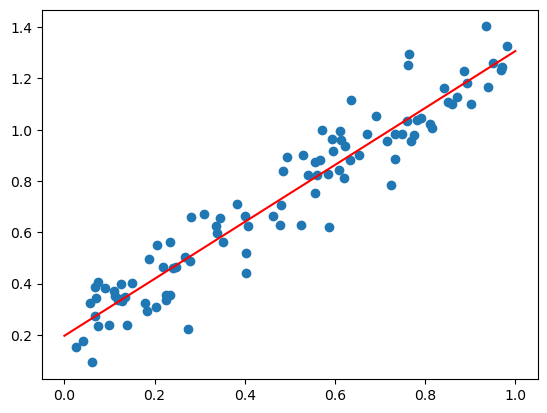

In [14]:
from matplotlib import pyplot as plt
plt.scatter(xs, ys)
xs_plot = np.linspace(0,1)
plt.plot(xs_plot, k*xs_plot + b, 'r');

## Example: plane least squares
Toy example of fitting a plane into 3D points.

The equation of a plane is given by $a x + by + c = z$.

In [ ]:
p0_error = 0.0 # Change me

points = np.array([[1, p0_error, 0], 
                   [0.01, 1, 0], 
                   [0, 0, 2], 
                   [1/(1.41), 1/(1.41), 0], 
                   [0.3, 0.5, 0.59], 
                   [0.2, 0.2, 1.2], 
                   [0.66, 0.75, -0.37]])
m, d = points.shape
A = np.hstack([points[:,0:2], np.ones((m, 1))])
y = points[:,d-1]

plane, _, _, _ = la.lstsq(A, y)
a, b, c = plane
print(f'Equation of the plane: z = {a:.2f}x + {b:.2f}y + {c:.2f}')

n = 10
xx, yy = np.meshgrid(np.linspace(0, 1, n), np.linspace(0, 1, n))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(xx, yy, a*xx + b*yy + c, alpha=0.2, rstride=2, cstride=2)
ax.scatter(points[:,0], points[:,1], points[:,2], 'o', color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=15, azim=-45);

## Example: Coope's method for circle fitting

Consider sequence of points $y_j \in \mathbb{R}^n, \ j = 1,2,...,N$ which we expect to lay on a ($n$-dimensional) circle with radius $r > 0$ and center $x \in \mathbb{R}^n$. If we wish to find $r$ and $x$ a sensible start would be to try minimize
$$ \sum_{j = 1}^N | \| x - y_j \| - r |^2,$$
but as shown in
> Coope, Ian D. *Circle fitting by linear and nonlinear least squares*. Journal of Optimization theory and applications, 76 (1993): 381-388. [link to paper](https://core.ac.uk/download/pdf/35472611.pdf).

This is a nonlinear problem and sensitive to outliers.

Coope proposed a linearized variant which is more robust: goal is to find $r, x$ which minimize

$$ \sum_{j = 1}^N | f_j(x,r) |^2,$$
where $f_j(x,r) = \| x - y_j \|^2 - r^2 = \| x \|^2 - 2 \langle x, y_j \rangle + \| y_j \|^2 - r^2$.

Clearly each $f_j$ would be minimized if there existed $x, r$ which solve the equations
$$ 2 \langle x, y_j \rangle - \| x \|^2 + r^2 = \| y_j \|^2. $$

If we put everything which depends on the unkowns $x$ and $r$ into a new vector $z \in \mathbb{R}^{n+1}$, build the system matrix $A$ such that the $j$ th row has values of $y_j$ on it and move all constants to the right hand side we get 
$$ A = \begin{pmatrix} 
\dots & y_1^T & \dots & 1 \\
\dots & y_2^T & \dots & 1 \\
& \vdots & & \vdots \\
\dots & y_N^T & \dots & 1
\end{pmatrix}, \ z = \begin{pmatrix}
\vdots \\
2x \\
\vdots \\
r^2 - \| x \|^2
\end{pmatrix} \ \text{and} \ d = \begin{pmatrix}
\|y_1\|^2 \\
\|y_2\|^2 \\
\vdots \\
\|y_N\|^2
\end{pmatrix}.$$
In particular now
$$ A z = \begin{pmatrix} 
2 y_1^T x + 1(r^2 - \| x \|^2) \\
2 y_2^T x + 1(r^2 - \| x \|^2) \\
\vdots\\
2 y_N^T x + 1(r^2 - \| x \|^2)
\end{pmatrix},$$
as desired.


This leads to an equivalent linear problem
$$ \min_{z} \| Az - d \|^2,$$
where the coordinates of the center point are $x_i = \frac{1}{2}z_i, \ i = 1,2,...,n$ and the radius $r = \sqrt{z_{n+1} + \| x \|^2}$. 

There are also many other methods for fitting circle and other shapes.

### Let's try Coope's method

In [28]:
def randomCirclePoints(n, rngSeed = None, noiseLevel = 0.05, thetaLims = (0, 2*np.pi)):
    '''Generate n random points approximately on some circle'''
    rng = np.random.default_rng(rngSeed) # Fixed randomness
    r = rng.uniform(1, 5) # Random radius between 1 and 5
    x = rng.uniform(0, 1, size=2) # Random center
    y = np.zeros((n,2))
    for j, theta in enumerate(rng.uniform(thetaLims[0], thetaLims[1], size=n)):
        noise = rng.normal(scale=noiseLevel, size=2)
        y[j,:] = x + r*np.array([np.cos(theta), np.sin(theta)]) + noise
    return y, (x, r)

N = 20
# Generate data, thetaLims limits the angular range giving just an arc of a circle (and makes the problem harder)
y, groundTruth = randomCirclePoints(N, thetaLims=(0,2.5))
x0, r0 = groundTruth # True origin and radius
print(f"{x0=}")
print(f"{r0=}")

x0=array([0.74579556, 0.08652453])
r0=2.6963236554303758


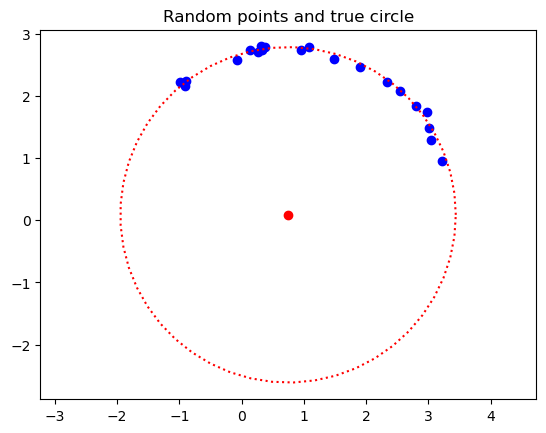

In [29]:
import matplotlib.pyplot as plt

plt.scatter(y[:,0], y[:,1], color='b')
plt.title('Random points and true circle')
plt.scatter(x0[0], x0[1], color='r');
an = np.linspace(0, 2*np.pi); plt.plot(x0[0] + r0*np.cos(an), x0[1] + r0*np.sin(an), 'r:');
ax = plt.gca()
ax.axis('equal');


In [30]:
A = np.concatenate([y, np.ones((N,1))], axis=1) # Form system matrix
d = np.array([np.sum(y[j]**2) for j in range(N)]) # Form data vector
z, _, _, _ = la.lstsq(A, d)
print(f"{z = }")

z = array([1.47638211, 0.29884937, 6.34532871])


x=array([0.73819105, 0.14942469])
r=2.629179050593915
Relative error for center point: 0.00712
Relative error for radius: 0.00062


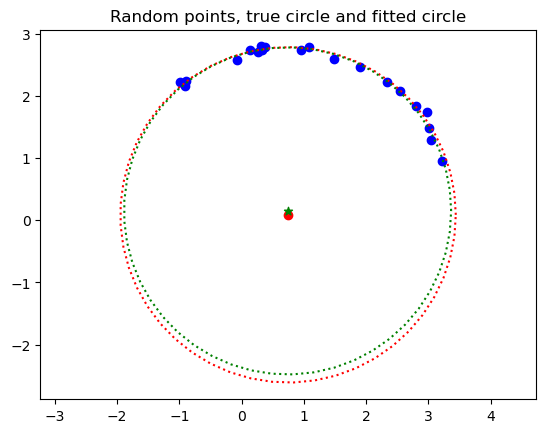

In [32]:
x = 0.5*z[0:2]
r = np.sqrt( z[2] + (x[0]**2 + x[1]**2) )
print(f"{x=}")
print(f"{r=}")

print(f"Relative error for center point: {np.sum((x0 - x)**2)/np.sum(x0**2):.5f}")
print(f"Relative error for radius: {(r0 - r)**2/r0**2:.5f}")

plt.scatter(y[:,0], y[:,1], color='b')
plt.title('Random points, true circle and fitted circle')
plt.scatter(x0[0], x0[1], color='r');
plt.scatter(x[0], x[1], color='g', marker='*');
an = np.linspace(0, 2*np.pi);
plt.plot(x0[0] + r0*np.cos(an), x0[1] + r0*np.sin(an), 'r:');
plt.plot(x[0] + r*np.cos(an), x[1] + r*np.sin(an), 'g:');
ax = plt.gca()
ax.axis('equal');


## Example: Random sample consensus (RANSAC)

[RANSAC](https://en.wikipedia.org/wiki/Random_sample_consensus) is an iterative parameter fitting method for data which contain outliers which would make a simple least-squares fit unusable. It was introduced in 
> Fischler, Martin and Bolles, Robert. *Random samples consensus: a paradigm for model fitting with applications to image analysis and automated cartography*. Communications of the ACM, 24(6):381–395, 1981. [DOI:10.1145/358669.358692](https://doi.org/10.1145/358669.358692)

In summary (with an affine model):

0. Start by picking a random subset of data points $y^{(0)}$. The size of the subset should be chosen as small as reasonably possible.
1. Given a subset of the data points $y^{(k)}$ at iteration $k$, fit a model $(A^{(k)} x^{(k)} = y^{(k)})$ to that smaller problem using least squares.
2. The quality of the model is then assessed on the whole dataset by checking how many points lie within a given *confidence parameter* of the candidate model. These points are called the *consensus set*.
3. If the consensus set is sufficiently big, use it as the next subset of data points $y^{(k+1)}$. Otherwise, randomly pick a new subset of data points $y^{(k+1)}$.
4. Terminate if $k = K_{\max}$ or some other stopping criterion is met. Otherwise increment $k$ and go to step 1.

RANSAC is used in computer vision applications where the measured data $y$ is a noisy and possibly erronous [point cloud](https://en.wikipedia.org/wiki/Point_cloud) in 3D space and we could, for example, try to find a plane or a vertex of a polygon that best matches most of the individual points.

Multiple point clouds from different directions can also be matched using RANSAC to estimate the transformation $T$ which determines the change in measurement directions. This is called [point-set registration](https://en.wikipedia.org/wiki/Point-set_registration).

## Example: MIMO and communications technology

This example is based on the fun and low-level talk given by Roope Vehkalahti during fall 2022 [Integraalipäivät](https://www.helsinki.fi/fi/unitube/video/80c8d9e8-9194-4ea9-892d-801e46b84f6c) (in Finnish only unfortunately). The higher level ideas are based on the paper

> Foschini, Gerard J. and Gans, Michael J. *One Limits of Wireless Communications in a Fading Environment when Using Multiple Antennas*. Wireless Personal Communications, 6:311-335, 1998. [DOI:10.1023/A:1008889222784](https://doi.org/10.1023/A:1008889222784)

In wireless communication it used to be the belief that to send a signal of length $n$, $n$ antennas would be needed, each with their own frequency band, meaning large scale wireless communication is very impractical. The [Multiple-Input and Multiple-Output](https://en.wikipedia.org/wiki/MIMO) (MIMO) method overcomes this limitation.

The basic idea is that when we send the values of a short signal $x \in \R^n$ in multiple directions at the same time (using $n$ transmitters), in perfect case the receiver obtains their sum
$$ y_j = x_1 + x_2 + ... + x_n,$$
in every channel $j$ which makes it impossible to determine each $x_i$.

However luckily in practice the signals bounce around from obstacles and the receiver obtains a sum of altered and noisy signals
$$ y = Hx + n,$$
where $n \in \R^n$ is a *reasonable* amount of noise and the columns $h_j$ of the *channel matrix* $H$ are the effect of the bouncing and other phenomena uniquely affecting $x$ sent in different directions $j$ (for example the different carrier frequencies behave differently).

If we start the communications with a known test signal, we can deduce $H$ and if $H$ is invertible, we can send $H^{-1}x$ instead of $x$ which means the receiver gets
$$ H( H^{-1} x) + n = x + n \approx x.$$

Therefore the disturbances on the signal make it possible to determine the original signal with multiple values. (Of course error corrections, denoising, what to send and in what form etc. are still needed but the problem of multiple antennas is solved mainly thanks to basic linear algebra.)

Similar ideas can be used to send different signals to different receivers using just one antenna (very useful when you don't want to build an antenna for every phone user in an area, for example).

# Further reading

Numerical linear algebra is a vast subject. Chapters 3 and 5 of [the book](#thebook) contain important topics that we won't cover. If you want to learn more about these topics, you can exercise your [flexible study right](https://studies.helsinki.fi/instructions/article/flexible-study-right-joo) and take the numerical matrix computations course at Aalto.

For an overview of linear algebra capabilities of SciPy see the [tutorial](https://docs.scipy.org/doc/scipy/tutorial/linalg.html). (The tutorial mentions the [outdated](https://numpy.org/devdocs/reference/generated/numpy.matrix.html) matrix class of NumPy, and you can just skip the section on this.) 

Methods to solve unstable and ill-posed problems are covered in the [inverse problems](https://studies.helsinki.fi/courses/course-unit/otm-c8ec19f4-5057-4ba3-b283-b53867483b09/MAST31401) courses (taught in periods 1 and 2). In particular the [singular value decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition) is covered and used extensibly so we will not cover it in further detail.